# Исследование объявлений о продаже квартир

В распоряжении имеется архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Основная задача — установить параметры, это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Описание данных
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)  
- *balcony* — число балконов  
- *ceiling_height* — высота потолков (м)  
- *cityCenters_nearest* — расстояние до центра города (м)  
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)  
- *first_day_exposition* — дата публикации  
- *floor* — этаж  
- *floors_total* — всего этажей в доме  
- *is_apartment* — апартаменты (булев тип)  
- *kitchen_area* — площадь кухни в квадратных метрах (м²)  
- *last_price* — цена на момент снятия с публикации  
- *living_area* — жилая площадь в квадратных метрах(м²)  
- *locality_name* — название населённого пункта  
- *open_plan* — свободная планировка (булев тип)  
- *parks_around3000* — число парков в радиусе 3 км  
- *parks_nearest* — расстояние до ближайшего парка (м)  
- *ponds_around3000* — число водоёмов в радиусе 3 км  
- *ponds_nearest* — расстояние до ближайшего водоёма (м)  
- *rooms* — число комнат  
- *studio* — квартира-студия (булев тип)  
- *total_area* — площадь квартиры в квадратных метрах (м²)  
- *total_images* — число фотографий квартиры в объявлении

## Оглавление

1. [Открытие и изучение файла](#step1)
2. [Предобработка данных](#step2)
3. [Добавление дополнительных параметров](#step3)
4. [Исследовательский анализ данных](#step4)
5. [Общий вывод](#step5)

<a id="step1"></a>
## 1. Открытие и изучение файла

In [1]:
# подключаем библиотеку Pandas
import pandas as pd

# для построения графиков
import matplotlib.pyplot as plt

Прочитаем данные из файла и выведем первые 5 строк для ознакомления.

In [2]:
data = pd.read_csv('real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Видим, что данные склеились и не разбились по колонкам, как мы ожидали. Также заметим, что данные разделены не запятыми, а табуляцией (символ \t). Прочитаем данные еще раз, но уже с правильным разделителем.

In [3]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Десятичные дроби разделяются точкой, как полагается, ничего добавлять в чтение файла больше не нужно. Посмотрим общую информацию о файле.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видно, что в колонках разное количество строк - поэтому, следующим шагом, необходимо будет проверить пустые значения в каждой колонке. Также необходимо будет отредактировать тип данных для некоторых колонок (например, в колонке `days_exposition` хранится количество дней, а значит должен содержаться тип данных - целые числа, а не вещественные, как сейчас).

Проверим названия столбцов, что в них нет лишних пробелов, иначе в дальнейшем могут возникнуть трудности при обращении к таким столбцам.

In [5]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Со столбцами все хорошо, лишних пробелов нет, все на латинице.

Выведем 10 первых строк, чтобы сформировать первичное впечатление от данных.

In [6]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

В таблице 23699 строк и 22 колонки. В данном файле csv в качестве разделителей между данными используется табуляция (\t), вместо стандртной запятой. По этой причине, файл был переоткрыт, уже с правильным разделителем. По информации из info, стало понятно, что в некоторых столбцах есть пропущенные значения, а также в них должен хранится другой тип данных, более подходящий для значений в этой колонке. На это стоит обратить внимание при предобработке.

<a id="step2"></a>
# 2. Предобработка данных

Посмотрим, где есть пустые значения.

In [7]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим каждую колонку в отдельности и решим, заполнять ли пропуски; если да, то каким значением; по какой причине данные пропуски могли появиться в таблице.

Столбец `is_apartment`. Определяет - является ли недвижимость аппартаментами, или нет. Содержит в себе булев тип. Данные вводились пользователем. Если не указано, то скорее всего жилище таковым не является. Заменим пропуски на False.

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Столбец `balcony`. Указывает на число балконов. Данные вводились пользователем. Если значение пропущено, то скорее всего балконов нет. Заменим пропуски на 0.

In [9]:
data['balcony'] = data['balcony'].fillna(0)

Столбцы `airports_nearest`, `cityCenters_nearest`. Указывают на расстояния до ближайшего аэропорта и до центра города соответственно. Данные получены автоматически. Если не указано, то скорее всего данные места находятся очень далеко, то есть поблизости их нет (допустим, в деревне нет центра города). Заменим пропуски на 0. Это будет эквивалентом, что расстояния нет.

In [10]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

Столбцы `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`. Указывают на число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км, расстояние до ближайшего водоёма соответственно. Данные получены автоматически. Если не указано количество, то скорее всего их нет. Заменим пропуски на 0. Если расстояние не указано, то по аналогии с аэропортами, места находятся далеко. Заменим пропуски на 0.

In [11]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

Столбец `days_exposition`. Определяет сколько дней было размещено объявление. Данные получены автоматически. Если не указано, то скорее всего от публикации до снятия не прошли сутки (то есть объявление висело менее дня). Заменим пропуски на 0.

In [12]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Столбец `ceiling_height` - высота потолков. Заполняется пользователем. Нельзя адекватно заполнить пропуски, потому что, этот параметр важен при покупки квартиры. Его нельзя усреднять, а также он не зависит от других показателей для квартиры и от других квартир. Оставим значения пустыми, чтобы не портить распределение данных.

Столбцы `floors_total` (всего этажей в доме), `living_area` (жилая площадь), `kitchen_area` (площадь кухни), `locality_name` (название населённого пункта) - аналогичная ситуация, как для `ceiling_height`.

Проверим еще раз, В каких колонках у нас остались пустые строки.

In [13]:
data.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

Проверим типы данных.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Столбец `first_day_exposition` (дата публикации) это дата, необходимо перевести тип данных в дата/время.

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Столбцы `balcony` (число балконов), `parks_around3000` (число парков в радиусе 3 км), `ponds_around3000` (число водоёмов в радиусе 3 км), `days_exposition` (сколько дней было размещено объявление) - в них значения должны быть целые, так как они все указывают на количество.

In [16]:
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)

Столбец `floors_total` (количество этажей в доме) тоже содержит количество, и сейчас тип данных определяется как float64. Однако стоит учесть, что он еще содержит пропущенные значения, которые являются float. Оставим с этим типом данных.

In [17]:
#data['floors_total'] = data['floors_total'].astype(int, errors='ignore')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Вывод

На данном шаге проводилась предобработка данных.
1. Были выявлены пропуски в столбцах.
    - Для данных, вводимых пользователем, наблюдается, что если какого-то параметра нет, то человек его просто не указывает. Как результат, появляются пропуски в этих местах. Такие значения были заменены на соответствующие (0 или False). Также наблюдались пропуски в важных данных, которые не могут отсутствовать в квартире. В этом случае, можно предположить, что человек либо забыл их указать (`locality_name`), либо решил, что информация не важна (`floors_total`, `ceiling_height`), либо посчитал, что остальная уже указанная информация уже отражает необходимые параметры (`total_area` важнее и включает в себя `kitchen_area` и `living_area`). Такие пропуски были оставлены без изменений, так как они повлияли бы на распределения.
    - Для данных, расчитываемых автоматически, пропуски указывают на несовершенство алгоритма подстановки (если не обнаружен какой-то объект или объект находится далеко, то подставляется пустое значение, хотя логичнее подставить 0).
2. Были изменены типы данных. В столбцах где должно быть указано количество, тип данных изменен на целочисленный. Также в столбце, где хранится время, оно также было приведено к подобающему формату.

<a id="step3"></a>
## 3. Добавление дополнительных параметров

Добавим в таблицу дополнительные столбцы с полезной информацией.

`price_per_sq_m` - цена квадратного метра

In [19]:
data['price_per_sq_m'] = data['last_price'] / data['total_area']

`weekday_exposition`, `month_exposition`, `year_exposition` - день недели, месяц и год публикации объявления

In [20]:
data['weekday_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year

`floor_enum` - этаж квартиры; варианты — первый, последний, другой.

In [21]:
def match_floor(row):
    if pd.isnull(row['floors_total']):
        return 'other'
    else:
        if row['floor'] == 1:
            return 'first'
        elif row['floor'] == int(row['floors_total']):
            return 'last'
        else:
            return 'other'

In [22]:
data['floor_enum'] = data.apply(match_floor, axis=1)

`living_to_total_area` - cоотношение жилой и общей площади

In [23]:
def calc_living_to_total_area(row):
    living_area = 0 if pd.isnull(row['living_area']) else row['living_area']
    return (living_area / row['total_area'])

In [24]:
data['living_to_total_area'] = data.apply(calc_living_to_total_area, axis=1)

`kitchen_to_total_area` - отношение площади кухни к общей площади

In [25]:
def calc_kitchen_to_total_area(row):
    kitchen_area = 0 if pd.isnull(row['kitchen_area']) else row['kitchen_area']
    return (kitchen_area / row['total_area'])

In [26]:
data['kitchen_to_total_area'] = data.apply(calc_kitchen_to_total_area, axis=1)

In [27]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_exposition,month_exposition,year_exposition,floor_enum,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,2,755.0,0,120370.370370,Thursday,March,2019,other,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,0,0.0,81,82920.792079,Tuesday,December,2018,first,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,2,574.0,558,92785.714286,Thursday,August,2015,other,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,3,234.0,424,408176.100629,Friday,July,2015,other,0.000000,0.000000
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,1,48.0,121,100000.000000,Tuesday,June,2018,other,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,0,0.0,55,95065.789474,Monday,September,2018,other,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,0,0.0,155,99195.710456,Thursday,November,2017,other,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,0,0.0,0,110544.692737,Thursday,April,2019,other,0.000000,0.263966
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,0,0.0,189,87454.764777,Wednesday,May,2018,other,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0,0.0,289,88524.590164,Sunday,February,2017,other,0.714754,0.106557


### Вывод

В таблицу были добавлены новые значения, которые понадобятся в дальнейшем при анализе данных. Для некоторых параметров есть все необходимые данные (существуют все значения в столбцах и новое значение можно вычислить из уже имеющихся). Однако, в некоторых столбцах остались незаполненные значения. Вычисления, использующие данные столбцы, потребовали дополнительных проверок на пустоту значения в ячейке. Если ячейка была пуста, то в качестве эквивалента брался 0.

<a id="step4"></a>
## 4. Исследовательский анализ данных

### 4.1. Изучить параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.

Построим гистограмму для **площади** и выведеv соответствующее описание данных.

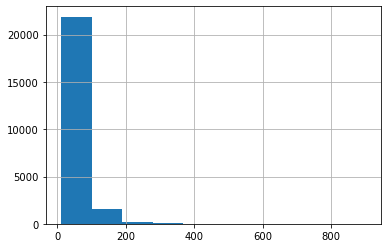

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [28]:
data['total_area'].hist()
plt.show()

data['total_area'].describe()

Из гистограммы и числовых значений видно, что есть выбросы для верхней границы: 900 квадратных метров - нереалистичная площаль для квартиры. Предложение ограничить сверху значением 400 (пусть существует квартира, которая занимает целый этаж). Также увеличим количество "корзин".

<AxesSubplot:>

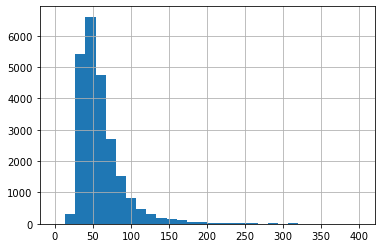

In [29]:
data['total_area'].hist(bins=30, range=(0, 400))

На данном графике мы можем увидеть распределение Пуассона с длинным хвостом. Среднее значение примерно 60 квадратных метров. Такие данные похожи на правду, действительно это площадь среднестатистической квартиры.

Построим гистограмму для **цен на квартиру** и выведем описание данных.

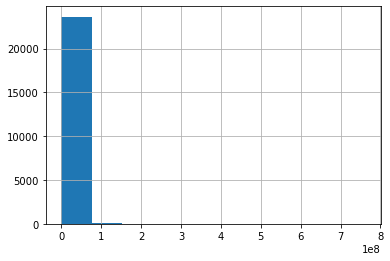

count        23699.000000
mean       6541548.771552
std       10887013.267545
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6800000.000000
max      763000000.000000
Name: last_price, dtype: object

In [30]:
data['last_price'].hist()
plt.show()

data['last_price'].describe().apply(lambda x: format(x, 'f'))

Сделаем гисторграмму более информативной. Как видим, подавляющее большинство стоит менее 20 млн.

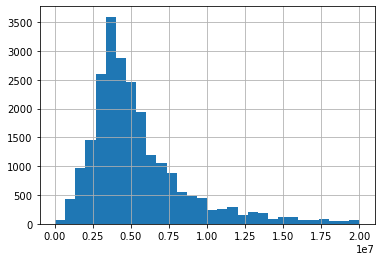

In [31]:
data['last_price'].hist(bins=30, range=(10000, 20000000))
plt.show()

Данный график также тяготеет к распределению Пуассона. Цена 6.5 млн рублей средняя для 60 кв.м. в Ленинградской области.

Построим гистограмму для **количества комнат** (сразу было ограничено до 10 комнат) и выыведем описание данных.

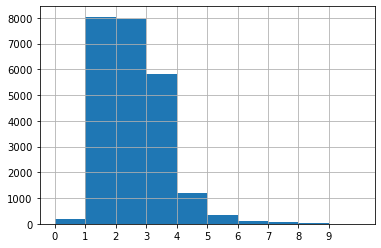

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


In [32]:
data['rooms'].hist(bins=10, range=(0, 10))
plt.xticks(range(10))
plt.show()

print(data['rooms'].describe())
print(data['rooms'].value_counts())

Среднее количество комнат 1-2. Картина реалистичная. Судя по гистограммам есть пара квартир, с большим количеством комнат, которые и стоят дорого, и площадь у них огромная. Но это скорее исключение из правил.

Построим гистограмму для **высот потолков** и выведем описание данных.

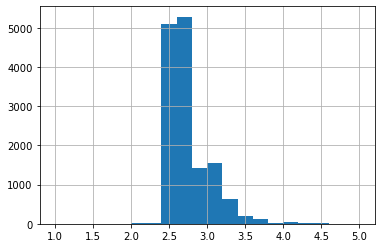

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [33]:
data['ceiling_height'].hist(bins=20, range=(1,5))
plt.show()

data['ceiling_height'].describe()

По описанию данных видно, что есть некорректные значения в 100 метров. Таких потолков точно не бывает. Возможно есть потолки до 5 метров в отдельных домах (поэтому и верхнее ограничение в range). Распределение носит Пуассоновский характер, это согласуется с здравой логикой.

### 4.2. Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Построим гистограмму. Значения среднего и медианы есть в описании данных.

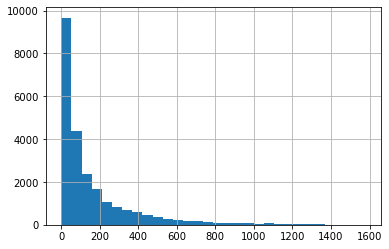

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [34]:
data['days_exposition'].hist(bins=30)
plt.show()

data['days_exposition'].describe()

Как видим из числового представления среднее значение равно 156.6, а медиана 74. Исходя из графика, ясно, что большие значения из 4-го квартиля, вносят весомый вклад в среднее. Оно сильно смещено от медианного в большую сторону. Построим диагрмму размаха.

<AxesSubplot:>

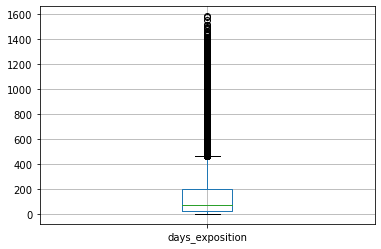

In [35]:
data.boxplot(column='days_exposition')

На данном графике очень много выбросов. Ограничим значения для данного графика по оси абсцисс.

<AxesSubplot:>

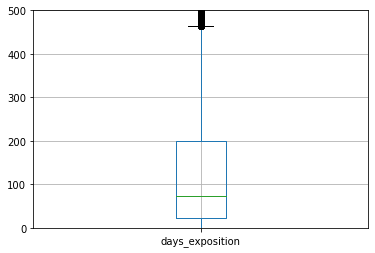

In [36]:
plt.ylim(0, 500)
data.boxplot(column='days_exposition')

Среднее значение по выборке сильно завышено, так как есть некоторое количество квартир, которые не могли продаться в течение нескольких лет. Не рассматривая эти ненормальные ситуации (медианное значение равно 74 дня), можно ориентироваться, что квартира будет продана примерно за 2.5 месяца. Из графиков видно, что средний период продажи колеблется от 22 до 199 дней. Если квартира продалась менее чем за это количество дней, то продажи пошли очень быстро, если дольше, то напротив, это уже необычайно долго.

### 4.3. Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.

Исходя из предшествующего анализа, ограничим нашу таблицу и уберем выбивающиеся значения.

Выше 500 дней - это выбивающиеся значения по длительности продажи.

<AxesSubplot:>

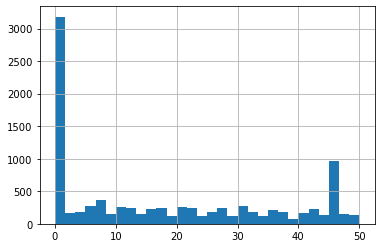

In [37]:
good_data = data.query('days_exposition < 500')
good_data['days_exposition'].hist(bins=30, range=(0, 50))

Видим резкий пик в нуле. Эти значения нехарактерны в выборке. Также исключим их.

<AxesSubplot:>

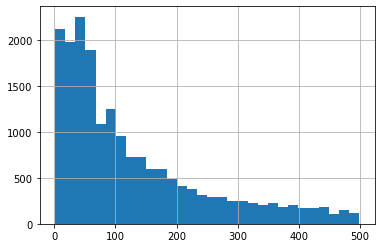

In [38]:
good_data = good_data.query('days_exposition != 0')
good_data['days_exposition'].hist(bins=30)

Отфильтруем таблицу также:

- для площади (верхнюю границу мы опредилил на предыдущем шаге)

In [39]:
good_data = good_data.query('total_area <= 400')

- для цен (границы также были определены при выводе соответствующей гистограммы)

In [40]:
good_data = good_data.query('10000 <= last_price <= 20000000')

- для количества комнат

In [41]:
good_data = good_data.query('0 <= rooms <= 10')

- для высот потолков

In [42]:
good_data = good_data.query('1 <= ceiling_height <= 5')

In [43]:
good_data = good_data.reset_index(drop=True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10617 entries, 0 to 10616
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           10617 non-null  int64         
 1   last_price             10617 non-null  float64       
 2   total_area             10617 non-null  float64       
 3   first_day_exposition   10617 non-null  datetime64[ns]
 4   rooms                  10617 non-null  int64         
 5   ceiling_height         10617 non-null  float64       
 6   floors_total           10613 non-null  float64       
 7   living_area            10006 non-null  float64       
 8   floor                  10617 non-null  int64         
 9   is_apartment           10617 non-null  bool          
 10  studio                 10617 non-null  bool          
 11  open_plan              10617 non-null  bool          
 12  kitchen_area           9890 non-null   float64       
 13  b

Исходя из выведенных гистограмм и анализа диаграммы размаха, убрали редкие и выбивающиеся значения. Получилось, что в таблице остались 10617 записей из 23699.

### 4.4. Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.

Еще раз посмотрим на данные.

In [44]:
good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_exposition,month_exposition,year_exposition,floor_enum,living_to_total_area,kitchen_to_total_area
0,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121,100000.000000,Tuesday,June,2018,other,0.320000,0.410000
1,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,0,0.0,289,88524.590164,Sunday,February,2017,other,0.714754,0.106557
2,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,2,553.0,137,127525.252525,Thursday,November,2017,other,0.512626,0.214646
3,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,3,298.0,366,82943.925234,Saturday,July,2017,last,0.630841,0.121495
4,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,0,0.0,397,81707.317073,Thursday,November,2017,first,0.678049,0.109756
5,8,3250000.0,31.0,2017-01-27,1,2.50,5.0,19.4,2,False,...,0,0.0,168,104838.709677,Friday,January,2017,other,0.625806,0.180645
6,16,14200000.0,121.0,2019-01-09,3,2.75,16.0,76.0,8,False,...,0,0.0,97,117355.371901,Wednesday,January,2019,other,0.628099,0.099174
7,12,6120000.0,80.0,2017-09-28,3,2.70,27.0,48.0,11,False,...,0,0.0,74,76500.000000,Thursday,September,2017,other,0.600000,0.150000
8,20,5000000.0,58.0,2017-04-24,2,2.75,25.0,30.0,15,False,...,0,0.0,60,86206.896552,Monday,April,2017,other,0.517241,0.189655
9,3,6800000.0,76.0,2015-10-01,2,2.75,23.0,39.0,18,False,...,1,564.0,300,89473.684211,Thursday,October,2015,other,0.513158,0.197368


Изучим зависимость стоимость квартиры от площади.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

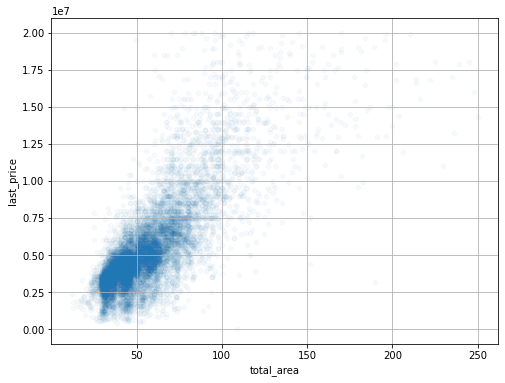

In [45]:
good_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03, figsize=(8, 6), grid=True)

Как видно из графика, данные взаимосвязаны. При увеличении площади квартиры, увеличивается и цена. Теперь найдем коэффициент корреляции.

In [46]:
good_data['last_price'].corr(good_data['total_area'])

0.7715177737335572

Данное значение довольно высокое, так что параметры крепко связаны. Однако, есть еще ряд параметров которые влияют на цену, при равных площадях. По этой причине у нас коэффициент не стримится к 1.

Выведем матрицу рассеяния.

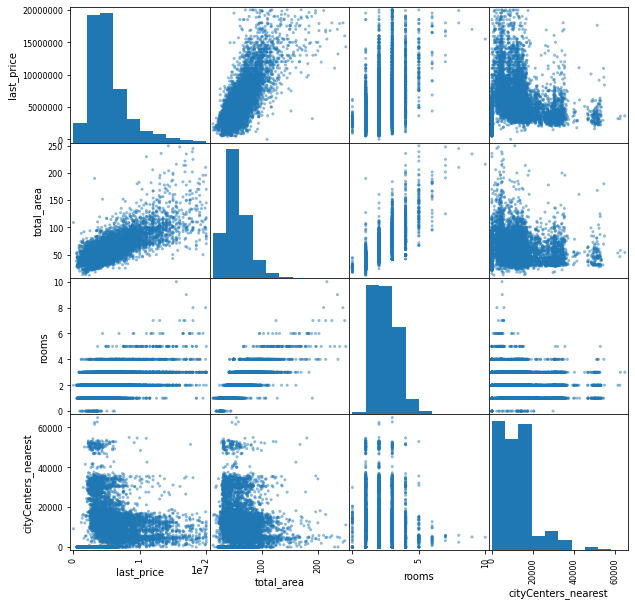

In [47]:
analise_data = good_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(analise_data, figsize=(10, 10))
plt.show()

Рассмотрим первую строку. Видно что с увеличением комнат цена в целом увеличивается, однако данные параметры должны быть не так тесно связаны. Так как комнат может быть больше, а площадь такая же. Что мы и видим для количества комнат 2-4.  

С удаленностью от центра наоборот, чем дальше, тем дешевле квартира. Коэффициент корреляции должен быть отрицательный. Но опять же, мы видим, что близко к центру, представлен весь диапазон цен, а значит площадь вносит больший вклад в фомирование цены, чем удобство инфраструктуры.

Посчитаем коэффициенты корреляции.

In [48]:
print(good_data['last_price'].corr(good_data['rooms']))
print(good_data['last_price'].corr(good_data['cityCenters_nearest']))

0.5139587601080574
-0.013920395163718388


Значения соответствуют предположениям. 

Изучим зависимость цены от этажа. Получим сводную таблицу и узнаем среднюю цену для этажей.

In [49]:
price_floor_stat = good_data.pivot_table(index='floor_enum', values ='last_price')
price_floor_stat['last_price'] = price_floor_stat['last_price'].apply(lambda x: format(x, 'f'))
price_floor_stat

,last_price
floor_enum,
first,4301781.403963
last,5201269.600829
other,5578210.977600


Из таблицы заметно, что более дорогие квартиры располагаются в "середине" дома. Спрос на квартиры на первом этаже самый маленький, поэтому и цена в среднем у них ниже. На последнем этаже также могут быть определенные проблемы с крышей, поэтому цена у них чуть ниже, чем в остальном по дому, за исключением самого нижнего этажа.

Изучим зависимость от даты размещения.

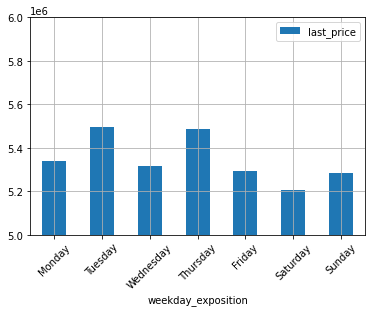

In [50]:
price_weekday_stat = (
    good_data
    .pivot_table(index='weekday_exposition', values='last_price')
    .reindex(['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
)

# чтобы график был нагляднее, ограничим по оси y.
price_weekday_stat.plot(ylim=(5000000, 6000000), kind='bar', grid=True)
plt.xticks(rotation=45)
plt.show()

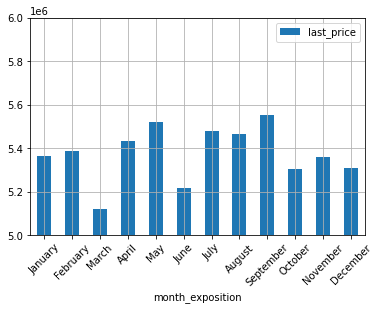

In [51]:
month = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]

price_month_stat = (
    good_data
    .pivot_table(index='month_exposition', values='last_price')
    .reindex(month)
)

# чтобы график был нагляднее, ограничим по оси y.
price_month_stat.plot(ylim=(5000000, 6000000), kind='bar', grid=True)
plt.xticks(rotation=45)
plt.show()

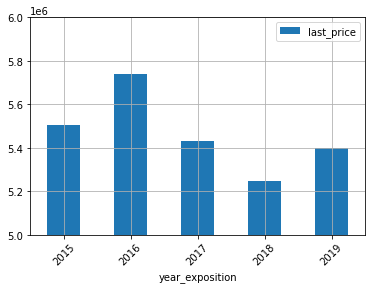

In [52]:
price_year_stat = (
    good_data
    .pivot_table(index='year_exposition', values='last_price')
)

# чтобы график был нагляднее, ограничим по оси y.
price_year_stat.plot(ylim=(5000000, 6000000), kind='bar', grid=True)
plt.xticks(rotation=45)
plt.show()

Исходя из гистограмм можно сделать следующие выводы:  
- Лучше всего выставлять квартиру на продажу в будние дни, особенно во вторник и четверг. Люди более всего предрасположены к серьезным покупкам в течение рабочей недели, поэтому цену можно ставить выше. Менее всего для выставления на продажу подходит суббота.  
- Цена также зависит и от месяца выставления на продажу. Квартиры возрастают в цене в теплые месяцы (апрель - август). Люди более охотно планируют свое будущее, и готовы платить больше, чтобы решить вопрос, не отклдывая надолго. Резкий спад в Июне, можно объяснить, что люди могут планировать свой отпуск, и стараются немного сэкономить.  
- Касательно года выставления продажи, самым выгодным для продавца был 2016 год. У людей были деньги, и в связи с этим можно было чуть повысить цену. Затем ситуация начала ухудшаться, и выправилась только к 2019 году.

### 4.5. Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

Выберем топ 10 населенных пунктов.

In [53]:
top_10_locality_names = good_data.groupby(by='locality_name')['locality_name'].count().sort_values(ascending=False)[0:10]
top_10_locality_names

locality_name
Санкт-Петербург      7337
Всеволожск            201
посёлок Шушары        177
посёлок Мурино        176
Колпино               170
Пушкин                164
посёлок Парголово     115
Гатчина               113
Петергоф              110
деревня Кудрово       106
Name: locality_name, dtype: int64

Подсчет средней цены.

In [54]:
(good_data
    .query('locality_name in @top_10_locality_names.index')
    .pivot_table(index='locality_name', values='price_per_sq_m')
    .sort_values(by='price_per_sq_m', ascending=False)
)

,price_per_sq_m
locality_name,
Санкт-Петербург,107517.695034
Пушкин,99553.903221
деревня Кудрово,91143.697618
посёлок Парголово,89570.355642
посёлок Мурино,88021.608210
Петергоф,83133.000359
посёлок Шушары,78743.024968
Колпино,74881.549470
Гатчина,69935.545927


Выявление населенных пунктов с самой высокой и самой низкой стоимостью жилья.

In [55]:
top_10_mean_prices = (
    good_data
    .query('locality_name in @top_10_locality_names.index')
    .pivot_table(index='locality_name', values='last_price')
    .sort_values(by='last_price', ascending=False)
)
top_10_mean_prices

,last_price
locality_name,
Санкт-Петербург,6.197737e+06
Пушкин,5.423419e+06
посёлок Парголово,4.382513e+06
деревня Кудрово,4.276337e+06
посёлок Шушары,4.176424e+06
Петергоф,4.013309e+06
посёлок Мурино,3.942472e+06
Колпино,3.854763e+06
Всеволожск,3.707997e+06


Среди 10 самых популярных мест (с точки зрения количества объявлений), на первом месте, очевидно, Санкт-Петербург. Далее идет серьезный спад по предложениям, и количество квартир на продажу примерно в одном и том же диапазоне. Средняя цена за квадратный метр в мегаполисе даже не обсуждается, очевидно выше всех. Далее идут туристическое направление (Пушкин) и ближайший пригород (спальный район Кудрово). Самая высокая стоимость жилья - Санкт-Петербург. Самая низкая - Гатчина. Это можно объяснить удаленностью от большого города и малым спросом.

### 4.6. Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге ('locality_name').  Задача — выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется — это и будет центральная зона.

In [56]:
good_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_sq_m',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'floor_enum', 'living_to_total_area', 'kitchen_to_total_area'],
      dtype='object')

In [57]:
sp_data = good_data.copy()
sp_data = sp_data.query('locality_name == "Санкт-Петербург"')
# округляем до целых в большую сторону
sp_data['cityCenters_km'] = (sp_data['cityCenters_nearest'] / 1000).apply('ceil')

In [58]:
price_per_km_stat = sp_data.pivot_table(index='cityCenters_km', values='last_price')
price_per_km_stat

,last_price
cityCenters_km,
0.0,7.015556e+06
1.0,9.949061e+06
2.0,1.035008e+07
3.0,9.167518e+06
4.0,8.789574e+06
5.0,9.441063e+06
6.0,8.410553e+06
7.0,7.239952e+06
8.0,7.475708e+06


<AxesSubplot:xlabel='cityCenters_km'>

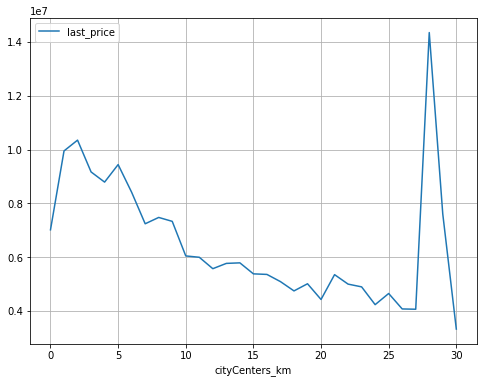

In [59]:
price_per_km_stat.plot(figsize=(8, 6), grid=True)

График сильно меняется на 2 километре. Таким образом, можно заключить, что часть города внутри окружности с таким радиусом можно считать центральной. В этом месте, цена начинает падать. Высокий пик на 28 км можно объяснить, что это та часть города, где уже можно строить новостройки, и цена в таких домах дороже, чем в домах ближе к центру, но старых.

### 4.7. Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всему городу?

total_area
count    126.000000
mean      82.014683
std       33.225860
min       12.000000
25%       59.250000
50%       76.950000
75%      100.000000
max      206.000000
Name: total_area, dtype: float64


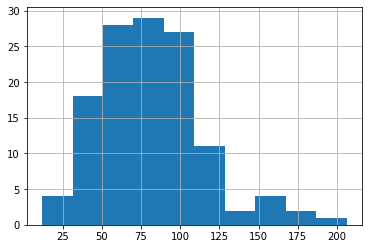

last_price
count    1.260000e+02
mean     1.000687e+07
std      3.993746e+06
min      2.400000e+06
25%      6.800000e+06
50%      9.100000e+06
75%      1.200000e+07
max      1.990000e+07
Name: last_price, dtype: float64


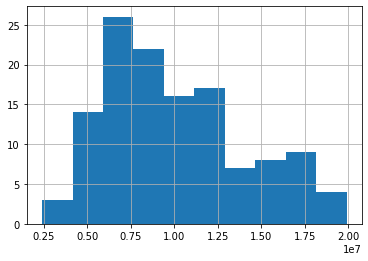

rooms
count    126.000000
mean       2.738095
std        1.174247
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: rooms, dtype: float64


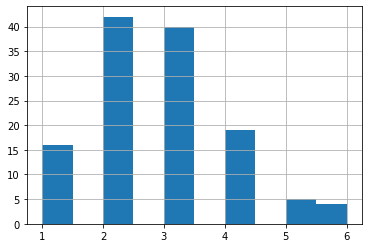

ceiling_height
count    126.00000
mean       3.15619
std        0.40121
min        2.50000
25%        2.80500
50%        3.11000
75%        3.45250
max        4.80000
Name: ceiling_height, dtype: float64


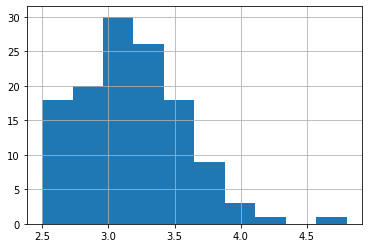

In [60]:
centre_data = sp_data.query('cityCenters_km <= 2')
params = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for cur_param in params:
    print(cur_param)
    print(centre_data[cur_param].describe())
    centre_data[cur_param].hist()
    plt.show()

Гистограмма площади квартиры показывает нам, что в центре квартиры больше, чем в целом по городу. Среднее значение здесь 82 метра против 60 по всему населенному пункту. Средняя цена соответственно также возросла с 6,5 млн рублей до 10 млн. рублей. Количество комнат также возросло, если по городу средним считается 1-2 комнаты, то в центре уже 2-3. Высота потолков увеличилась с 2,7 м до 3,1 м. В центре здания старее, и стандарты постройки были другие.

Посчитаем коэффициенты корреляции для данных в общем городу и данных в центре.

In [61]:
print('all_city: price-rooms = ', good_data['last_price'].corr(good_data['rooms']))
print('all_city: price-cityCenter = ', good_data['last_price'].corr(good_data['cityCenters_nearest']))

print('centre: price-rooms = ', centre_data['last_price'].corr(centre_data['rooms']))
print('centre: price-cityCenter = ', centre_data['last_price'].corr(centre_data['cityCenters_nearest']))

all_city: price-rooms =  0.5139587601080574
all_city: price-cityCenter =  -0.013920395163718388
centre: price-rooms =  0.43614172892901043
centre: price-cityCenter =  0.07878759965460619


Что касается квартир в центре, общая тенденция наблюдается - зависимость от количества комнат, но она слабее, чем в целом по городу. Это можно объяснить, что квартру в таком районе покупают не из-за ее площади, а из-за удобства расположения. Удаленность от центра в данной ситуации не играет вообще никакой роли. На каждом километре центра представлены абсолютно разные цены.

Рассмотрим зависимость цены от этажа.

In [62]:
centre_price_floor_stat = centre_data.pivot_table(index='floor_enum', values ='last_price')
centre_price_floor_stat['last_price'] = centre_price_floor_stat['last_price'].apply(lambda x: format(x, 'f'))
centre_price_floor_stat

,last_price
floor_enum,
first,8172499.950000
last,9275937.500000
other,10818729.729730


В данном случае с один в один с общей картиной. Самые дешевые - на первом этаже, далее - последний этаж, и самые дорогие - в "середине" дома.

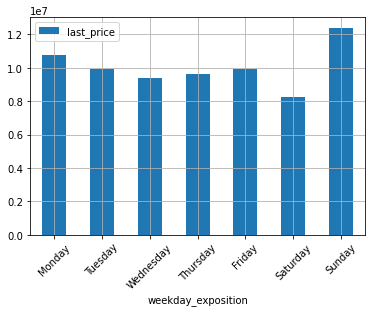

In [63]:
centre_price_weekday_stat = (
    centre_data
    .pivot_table(index='weekday_exposition', values='last_price')
    .reindex(['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
)
centre_price_weekday_stat.plot(kind='bar', grid=True)
plt.xticks(rotation=45)
plt.show()

Похоже на то, что в центре, квартиры лучше выставлять в выходной день (воскресенье), а не в будний.

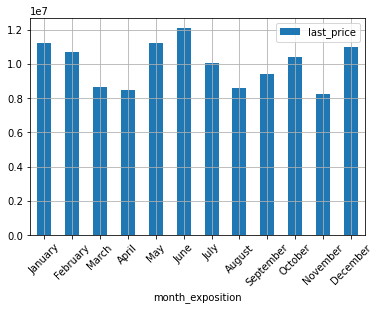

In [64]:
month = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]

centre_price_month_stat = (
    centre_data
    .pivot_table(index='month_exposition', values='last_price')
    .reindex(month)
)
centre_price_month_stat.plot(kind='bar', grid=True)
plt.xticks(rotation=45)
plt.show()

Картина противоположная в сравнении со всем городом. Здесь скачок цен, происходит в июне. Также высокая средняя цена для января, февраля, октября и декабря. Похоже, что целевая аудитория квартир в центре и всех остальных - противоположно разная.

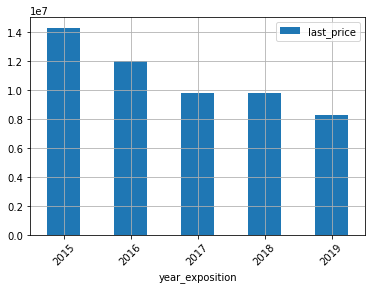

In [65]:
centre_price_year_stat = (
    centre_data
    .pivot_table(index='year_exposition', values='last_price')
)
centre_price_year_stat.plot(kind='bar', grid=True)
plt.xticks(rotation=45)
plt.show()

Предложений квартир в 2015 было больше всего, а дальше пошло на спад. В отличие от всех квартир, где пик пришелся на 2016, и после спада выравнялся к 2019. Похоже, что люди перестали стремиться продавать свою недвижимость в центре, так пропал спрос на нее.

### Вывод

На данном шаге мы исследовали данные по продаже квартир, а также распределения разных параметров и влияние одних параметров на другие.    

Среднестатистическая квартира по Ленинградской области, это 1-2 комнатная квартира, площадью 60 кв.м., высотой потолков 2.7 м, стоимостью 6.5 млн.руб. Квартира в среднем продается за 2.5 месяца. На стоимость квартиры более всего влияет площадь, и, как следствие, количество комнат. Также люди смотрят на этаж покупаемой квартиры, и предпочитают брать не на крайних этажах. 

Наилучшее время для продажи квартры был 2016 год. Что касается, месяцев продажи, то стоит рассматривать в большей степени весенне-летние месяцы, цены на эти квартиры выше.

Цена за квадратный метр, как и цена в целом, выше всего в Санкт-Петербурге, и убывает по мере отдаления от него.
Были исследованы данные для центрального района Санкт-Петербурга, который был определен экспериментальным путем. Данные получились ожидаемые, квартиры дороже, комнат больше, потолки выше. В данном районе рассматриваемые показатели влияют на цену уже не столько сильным образом. Все еще важен этаж и количество комнат. Также было выявлено, что целевые покупатели, это уже другие люди, потому что зависимость цены от даты выставления объявления отлична (пик объявлений пришелся на 2015 год и цены выше в осенне-зимние месяцы).

<a id="step5"></a>
## 5. Общий вывод

В ходе работы над проектом были изучены первоначальные данные. Проведена их предобработка, были заполнены, где можно, пропущенные значения, а также отредактированы типы данных в колонках. Далее в таблицу были добавлены полезные параметры, с помощью которых появилась возможность более подробно проанализировать данные. После всех предварительных операций были изучены различные параметры квартир, определены характерные значения, выявлена зависимость цены квариры от них.